In [116]:
from __future__ import absolute_import, print_function, unicode_literals
import sys
import os
import repackage
repackage.up(stepup=2)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import analysis2 as a2
from flutype.models import Spot
import django
django.setup()
from importlib import reload


In [117]:
reload(a2)
studies = ["elisa_2018_03_28"]
analyte_batches = ["A/Aichi/2/68(H3N2)-4-5",
                  "A/Aichi/2/68(H3N2)-4-10",
                  "A/Aichi/2/68(H3N2)-4-20",
                  'A/Brisbane/10/2007(H3N2)-10',
                  'A/Brisbane/10/2007(H3N2)-20',
                  'A/Brisbane/10/2007(H3N2)-5',
                  'A/Brisbane/59/2007(H1N1)-10',
                  'A/Brisbane/59/2007(H1N1)-20',
                  'A/Brisbane/59/2007(H1N1)-5',
                  'A/California/07/2009(H1N1)-3-10',
                  'A/California/07/2009(H1N1)-3-20',
                  'A/California/07/2009(H1N1)-3-5',
                  'A/Hong Kong/4801/2014(H3N2)-10',
                  'A/Hong Kong/4801/2014(H3N2)-20',
                  'A/Hong Kong/4801/2014(H3N2)-5',
                  'A/Panama/2007/1999(H3N2)-3-10',
                 'A/Panama/2007/1999(H3N2)-3-20',
                 'A/Panama/2007/1999(H3N2)-3-5',
                   "Buffer001",

                  ]
spots_dj = Spot.objects.filter(raw_spot__raw_spot_collection__studies__sid__in=studies)
spots_dj = spots_dj.filter(raw_spot__lig_mob_batch__sid__in=analyte_batches)


480

In [104]:
data = a2.Data(spots_dj=spots_dj)#.outlier_filtering().sample_on_collection(20).clean()


In [110]:
data.spots_pd

,Ligand Batch,Ligand Batch Concentration,Ligand,Analyte Batch,Analyte Batch Concentraion,Analyte,Intensity,Std,Circle Quality,Collection,Study,Row,Column,Collection Type,Replica
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


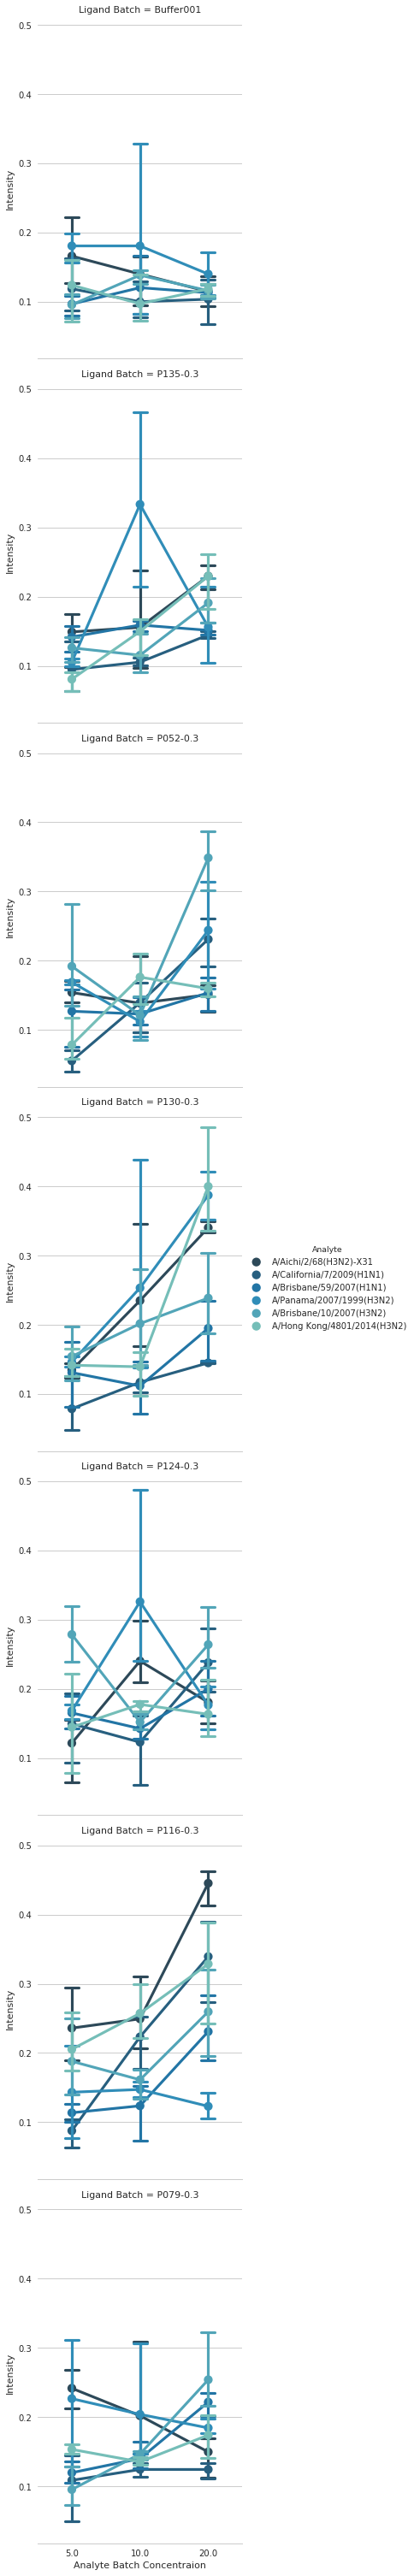

In [115]:
import seaborn as sns
sns.set(style="whitegrid")


# Draw a pointplot to show pulse as a function of three categorical factors
g = sns.factorplot(x="Analyte Batch Concentraion", y="Intensity", hue="Analyte", row="Ligand Batch", data=data.spots_pd,
                   capsize=.2, palette="YlGnBu_d", size=6, aspect=.75)
g.despine(left=True)

In [ ]:


# Load the example exercise dataset
df = sns.load_dataset("exercise")

# Draw a pointplot to show pulse as a function of three categorical factors
g = sns.factorplot(x="time", y="pulse", hue="kind", col="diet", data=df,
                   capsize=.2, palette="YlGnBu_d", size=6, aspect=.75)
g.despine(left=True)

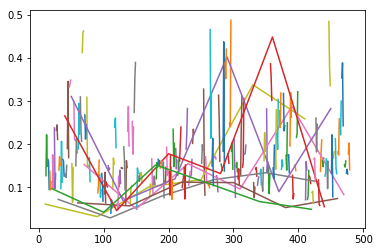

In [106]:
for ln, ld in data.spots_pd.groupby("Ligand Batch"):
    for an, ad in ld.groupby("Analyte Batch"):
        .plot()
    

In [52]:
frames = {}
for cn, d in  data.spots_pd.groupby(["Collection","Ligand Batch"]):
    d["Intensity"] = d["Intensity"]-d[d["Analyte Batch"] == "Buffer001"]["Intensity"].mean()
    frames[cn]=d

spots_pd_new = pd.concat(frames)

 
    

/home/janekg89/Envs/flutype_webapp3/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [53]:
data_selected = a2.Data(spots_pd=spots_pd_new)

In [94]:
model_pca = data_selected.x_pca_fit()
test_data = model_pca.transform(data_selected.x)


In [96]:
#sns.heatmap(model_pca.scalings_, center=True)

In [97]:
import numpy as np
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
print (__version__) # requires version >= 1.9.0

#Always run this the command before at the start of notebook
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from sklearn import preprocessing


2.5.1


In [98]:
le = preprocessing.LabelEncoder()
le.fit(data_selected.y_names)
cs = le.transform(data_selected.y_names)
colors =cs.astype(float) / cs.max()

In [100]:
import numpy as np

def lda_plot(data, ax,contour=False, **kwargs):
    colors = sns.color_palette()
              
    for (n, d),c,cmap in zip(data.groupby("Analyte"),colors,cmaps):
        
        x = d["Principle 1"]
        y = d["Principle 2"]

        
trace1 = go.Scatter3d(
    x=test_data[:,0],
    y=test_data[:,1],
    z=test_data[:,2],
    text = data.y_names+"<br>"+data.x.index.get_level_values("Collection"),
    mode='markers',
    hoverinfo='text',
    #hoverlabel=dict(bgcolor=list(colors)),
    marker=dict(
        size=7,
        color=colors,                # set color to an array/list of desired values
        colorscale='Jet',   # choose a colorscale
        opacity=0.99)
)

this = [trace1]
layout = go.Layout(
    #scene=dict(
    #    xaxis = dict(showspikes=False),
    #    yaxis = dict(showspikes=False),
    #    zaxis = dict(showspikes=False),

        

     #   )
    )
fig = go.Figure(data=this, layout=layout)
iplot(fig, filename='3d-scatter-colorscale')

In [30]:
import seaborn as sns

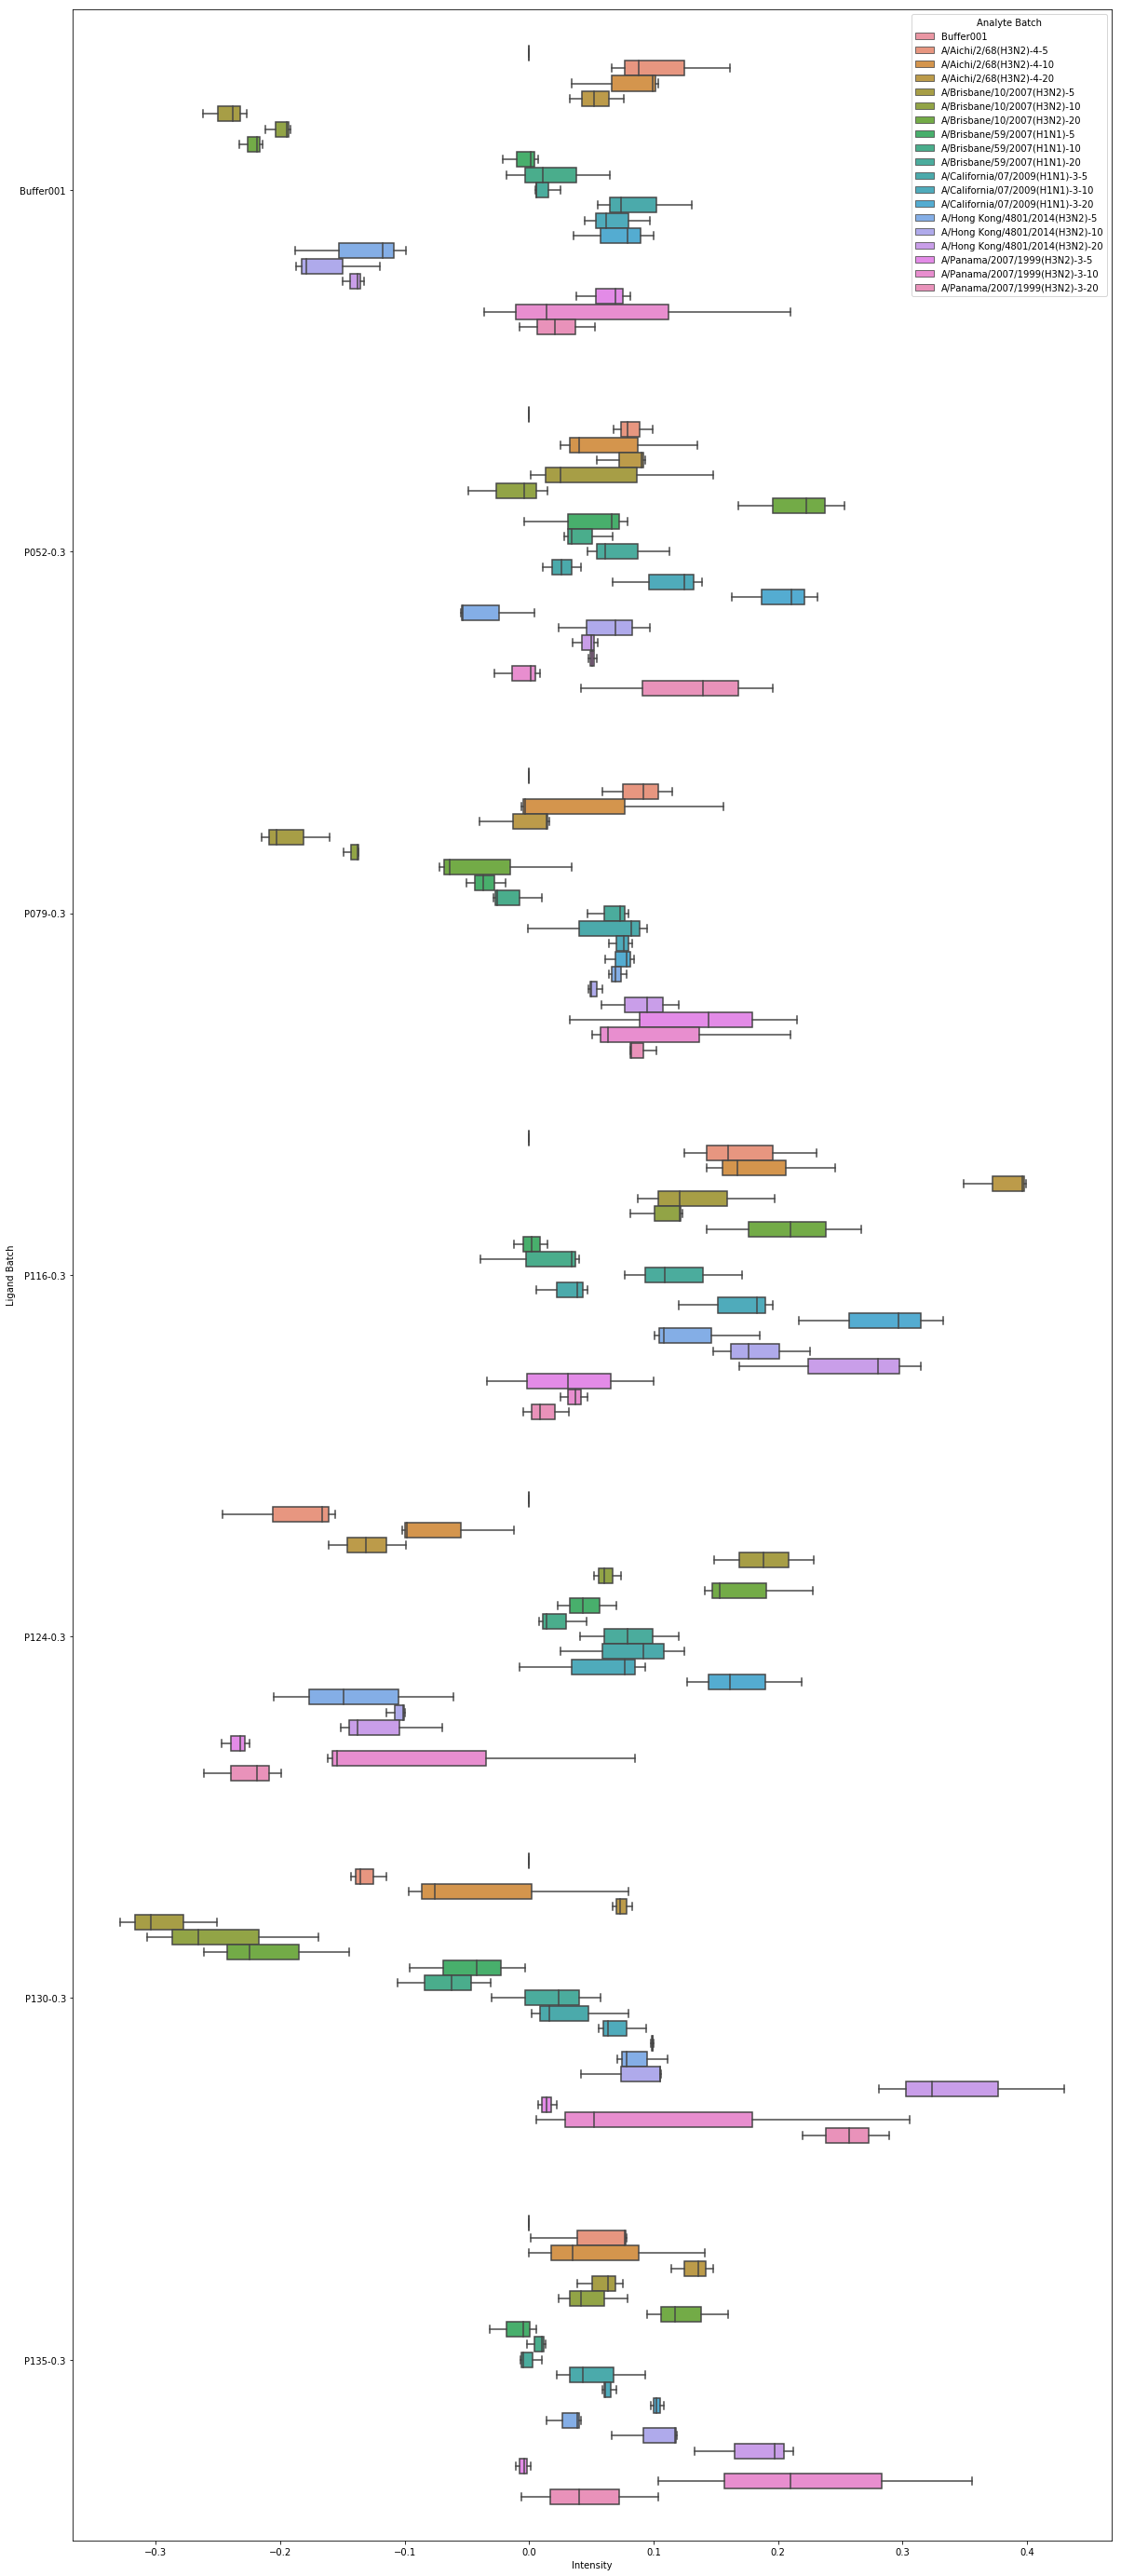

In [65]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20,50))
ax = sns.boxplot(y="Ligand Batch",hue="Analyte Batch", x="Intensity", data=data_selected.spots_pd)


In [184]:
#data = a2.Data(spots_dj=spots_dj)#.outlier_filtering().sample_on_collection(10).clean()


In [83]:
#data.x
6*["o","s","D"]+["x"]

['o',
 's',
 'D',
 'o',
 's',
 'D',
 'o',
 's',
 'D',
 'o',
 's',
 'D',
 'o',
 's',
 'D',
 'o',
 's',
 'D',
 'x']

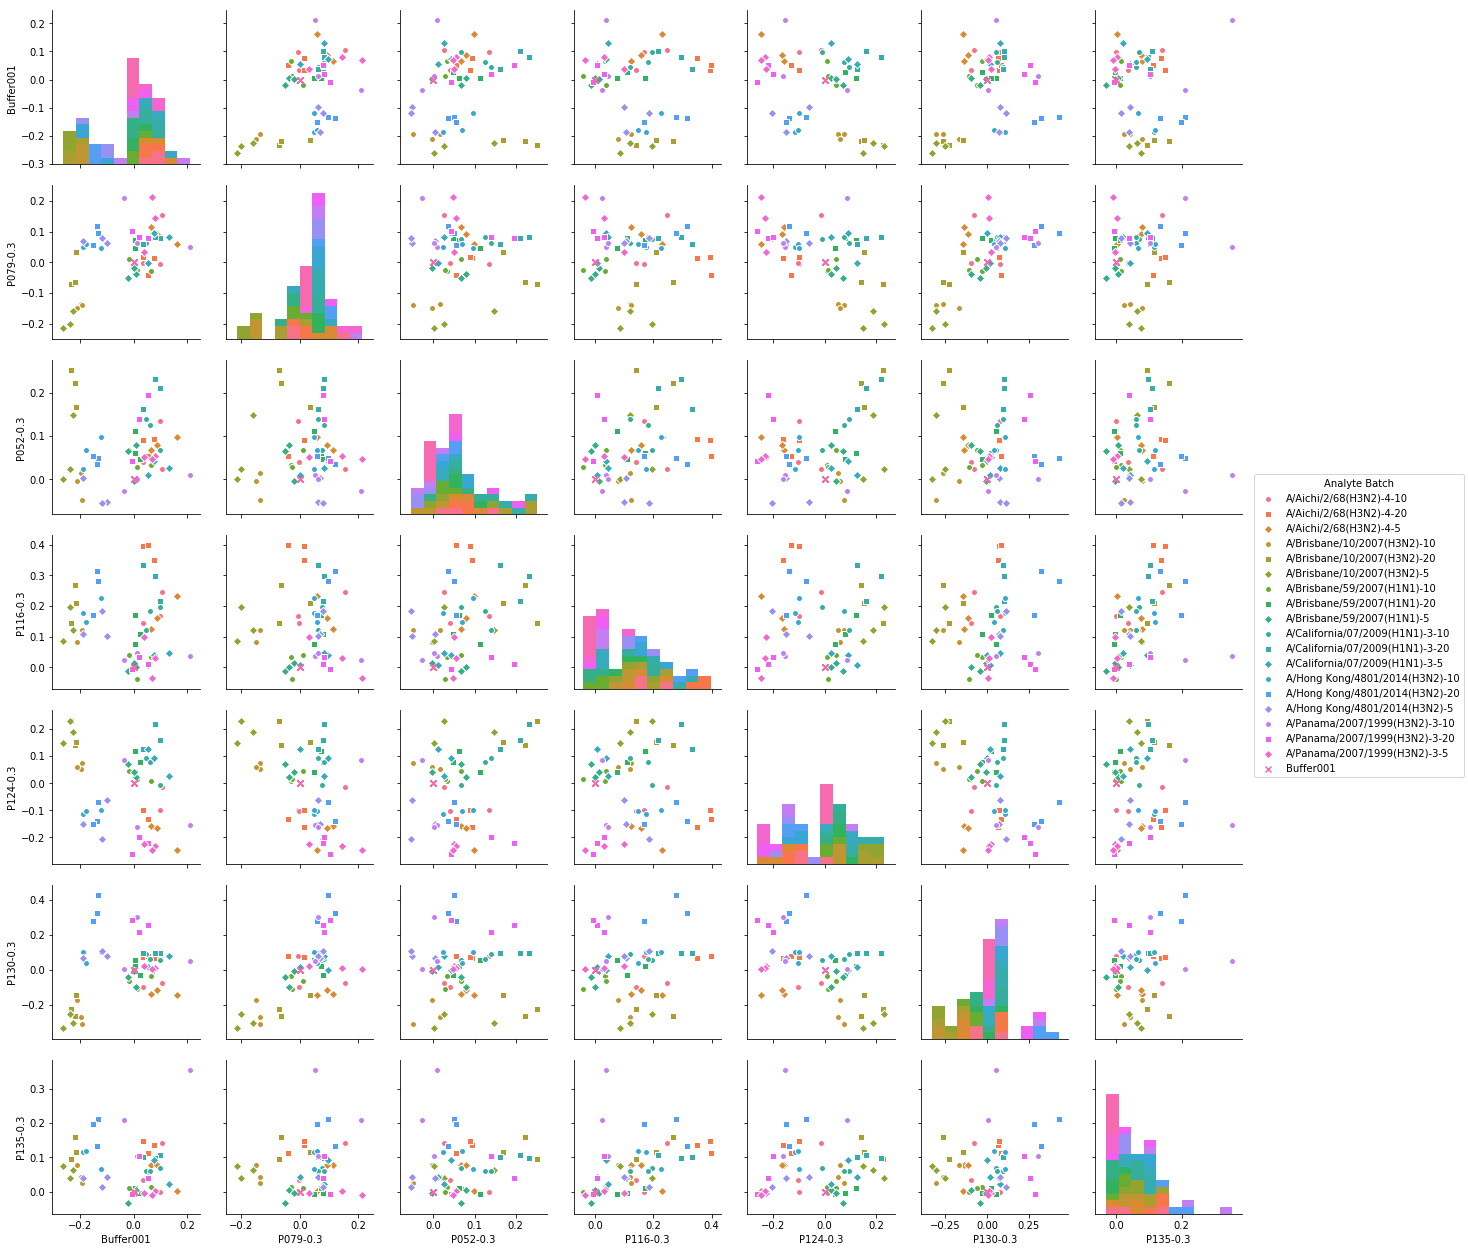

In [91]:
sns.pairplot(data=data_selected.x.reset_index(),vars=["Buffer001","P079-0.3","P052-0.3","P116-0.3","P124-0.3","P130-0.3","P135-0.3"],hue="Analyte Batch",palette="husl",markers= 6*["o","s","D"]+["x"])

In [189]:
reload(a2)
data1 = a2.Data(spots_pd=data.spots_pd[data.spots_pd["Analyte Batch Concentraion"] == 10])


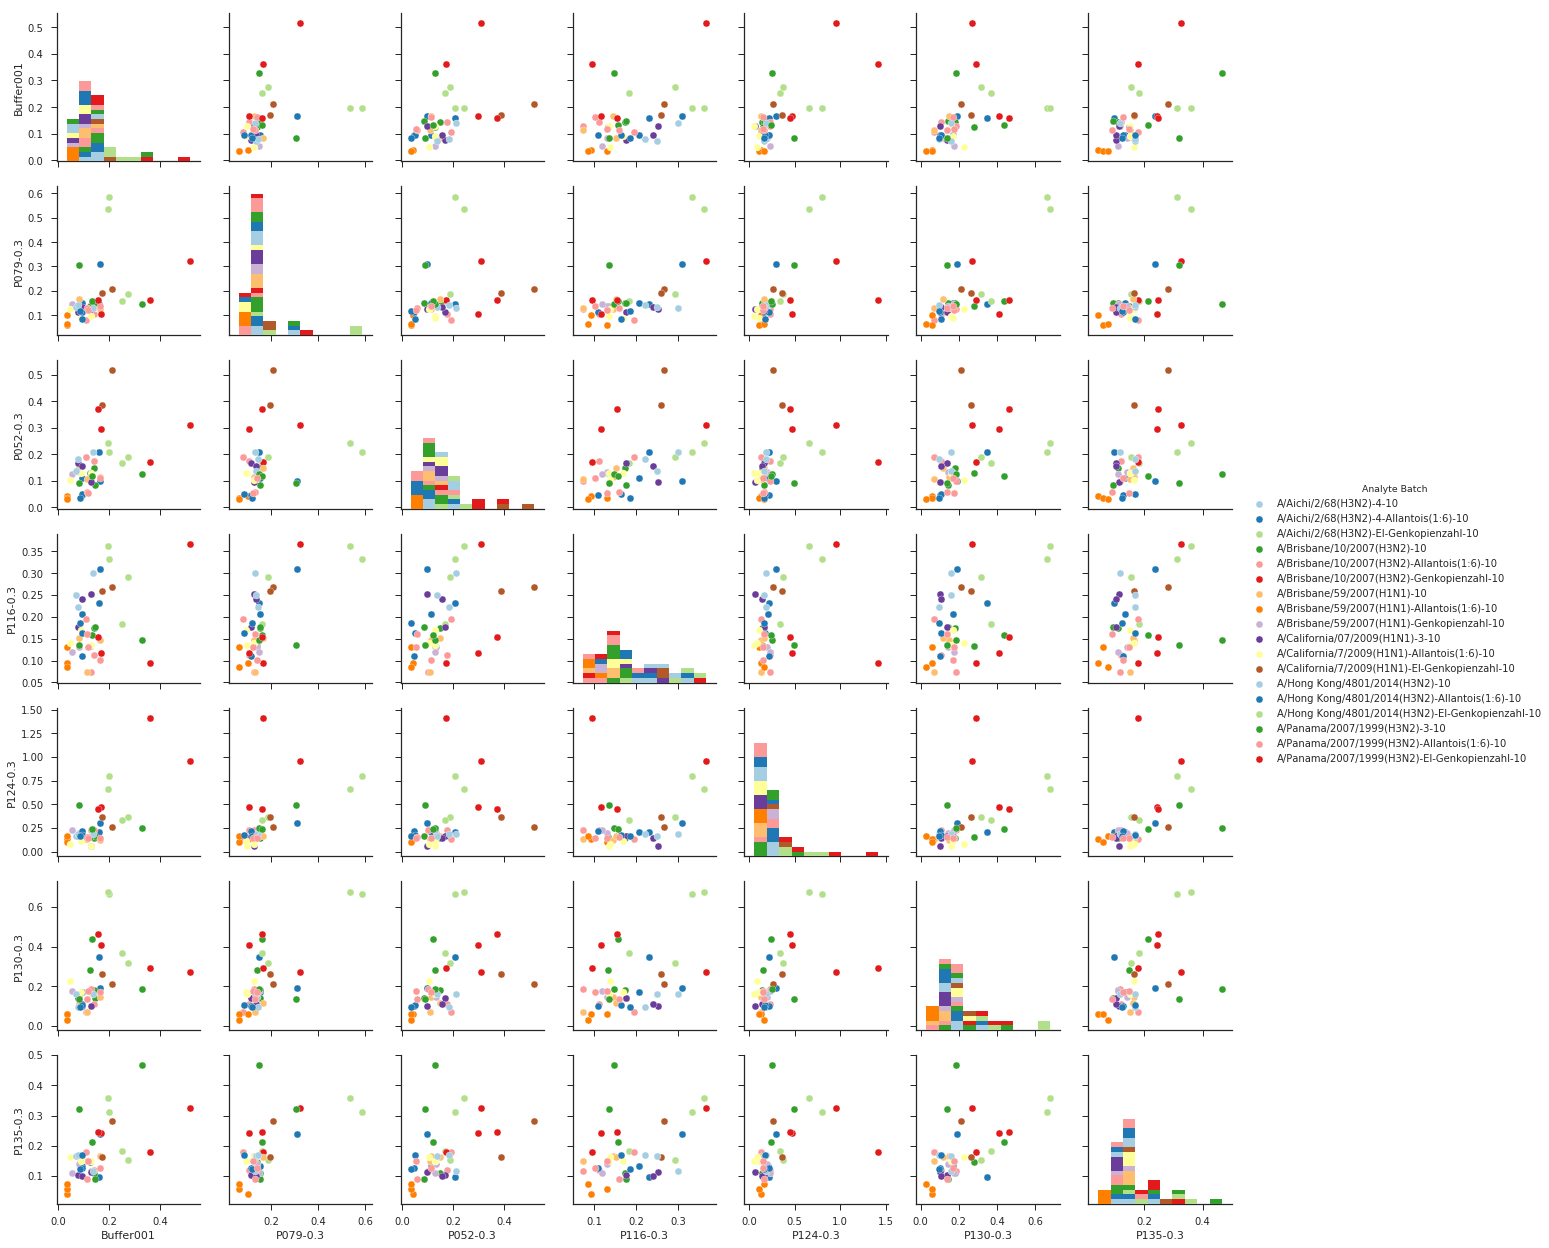

In [190]:
sns.pairplot(data=data1.x.reset_index(),vars=["Buffer001","P079-0.3","P052-0.3","P116-0.3","P124-0.3","P130-0.3","P135-0.3"], hue="Analyte Batch", palette="Paired", )    

In [73]:
data_selected.x

Ligand Batch                                                   Buffer001  \
Analyte Batch                   Collection            Replica              
A/Aichi/2/68(H3N2)-4-10         2018_03_21-achi-1     4.0          0.104   
                                                      5.0          0.099   
                                                      6.0          0.034   
A/Aichi/2/68(H3N2)-4-20         2018_03_21-achi-1     7.0          0.076   
                                                      8.0          0.033   
                                                      9.0          0.052   
A/Aichi/2/68(H3N2)-4-5          2018_03_21-achi-1     1.0          0.066   
                                                      2.0          0.161   
                                                      3.0          0.088   
A/Brisbane/10/2007(H3N2)-10     2018_03_21-bris10-1   4.0         -0.195   
                                                      5.0         -0.192   
                                                      6.0         -0.212   
A/Brisbane/10/2007(H3N2)-20     2018_03_21-bris10-1   7.0         -0.233   
                                                      8.0         -0.219   
                                                      9.0         -0.214   
A/Brisbane/10/2007(H3N2)-5      2018_03_21-bris10-1   1.0         -0.227   
                                                      2.0         -0.262   
                                                      3.0         -0.238   
A/Brisbane/59/2007(H1N1)-10     2018_03_21-bris59-1   4.0          0.065   
                                                      5.0          0.011   
                                                      6.0         -0.018   
A/Brisbane/59/2007(H1N1)-20     2018_03_21-bris59-1   7.0          0.005   
                                                      8.0          0.025   
                                                      9.0          0.006   
A/Brisbane/59/2007(H1N1)-5      2018_03_21-bris59-1   1.0         -0.021   
                                                      2.0          0.007   
                                                      3.0          0.001   
A/California/07/2009(H1N1)-3-10 2018_03_21-cal-1      4.0          0.097   
                                                      5.0          0.045   
                                                      6.0          0.062   
A/California/07/2009(H1N1)-3-20 2018_03_21-cal-1      7.0          0.100   
                                                      8.0          0.079   
                                                      9.0          0.036   
A/California/07/2009(H1N1)-3-5  2018_03_21-cal-1      1.0          0.055   
                                                      2.0          0.074   
                                                      3.0          0.131   
A/Hong Kong/4801/2014(H3N2)-10  2018_03_21-hongknog-1 4.0         -0.187   
                                                      5.0         -0.179   
                                                      6.0         -0.120   
A/Hong Kong/4801/2014(H3N2)-20  2018_03_21-hongknog-1 7.0         -0.133   
                                                      8.0         -0.138   
                                                      9.0         -0.150   
A/Hong Kong/4801/2014(H3N2)-5   2018_03_21-hongknog-1 1.0         -0.188   
                                                      2.0         -0.099   
                                                      3.0         -0.118   
A/Panama/2007/1999(H3N2)-3-10   2018_03_21-pana-1     4.0          0.210   
                                                      5.0          0.014   
                                                      6.0         -0.036   
A/Panama/2007/1999(H3N2)-3-20   2018_03_21-pana-1     7.0          0.053   
                                                      8.0          0.021   
                                                

In [191]:
dx = data1.spots_pd.pivot_table(values="Intensity",columns="Analyte Batch", index=["Ligand Batch", "Replica"])

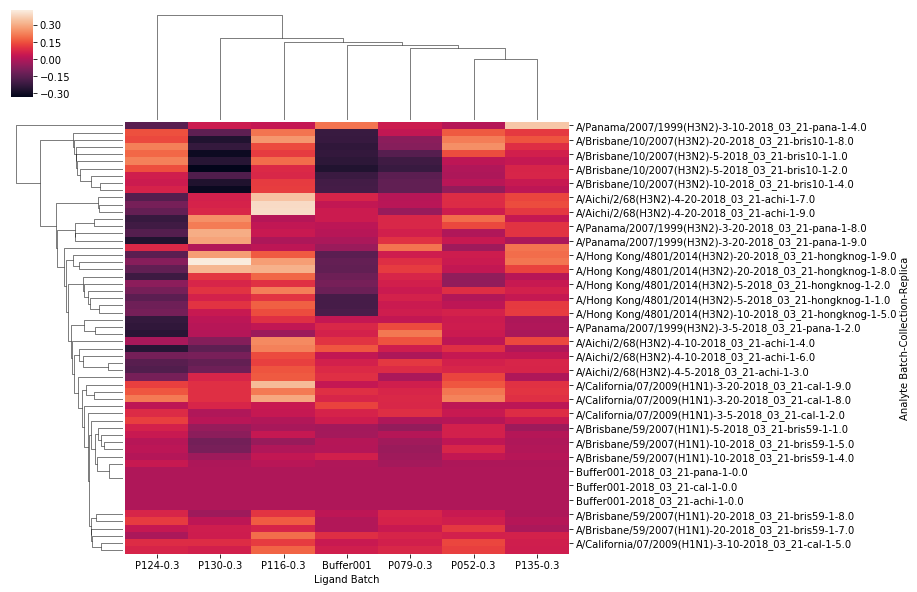

In [74]:
#fig, ax = plt.subplots( nrows=1, ncols=1,figsize=(10,10))
ax=sns.clustermap(data_selected.x, method="single")